# Load libraries

It's the start of everything

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

# Loading the data and creating the network

Loading data in networkX is very straight forward. In the most basic case, you only have to provide a NetworkX with a list of edges, and the package will automatically create the nodes and connect them with an edge.

As the first example, we will load and play around with data extracted from email data from a large European research institution [1,2]. The data is stored in the *email-Eu-core.txt* file in the data directory.

Fist, we use pandas to load the txt file in to a DataDrame


In [2]:
network_data_frame = pd.read_csv('data/email-Eu-core.txt', sep=' ', header = None)
network_data_frame.head()

,0,1
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


Here each row represents an edge between its two elements.

Now we initialize the network as an object of the **Graph** class in NetworkX (if you are not familiar with the object oriented paradigm, don't worry to much about the techincalities).

Then we can use the **add_edges_from** method to create the graph, by just suppling it with a list of edges.

Obs: In this example, the nodes are numbered, but it is also possible to work with named nodes, just provide the edge list as pairs of strings. Also, if you are working with a **directed graph**, you will need to use the **Digraph** class, and in this case the order in which you provide the edges information matters, as it reads the pairs of nodes as [from, to].

In [3]:
network = nx.Graph()
network.add_edges_from(network_data_frame.values)

Let's display the network to see what it looks like. This can be done with the **draw** function. 

There are many ways in which a graph can be displayed. By default the **draw** function uses a so called [force-directed graph drawing](https://en.wikipedia.org/wiki/Force-directed_graph_drawing) to position the nodes, and this might take a bit of time to calculate. There are other functions like **draw_circular** or **draw_random** that use other techniques.

(bellow also use a few parameters to make the graph look more pleseant, like *node_size* and *edge_color*. They are optional)

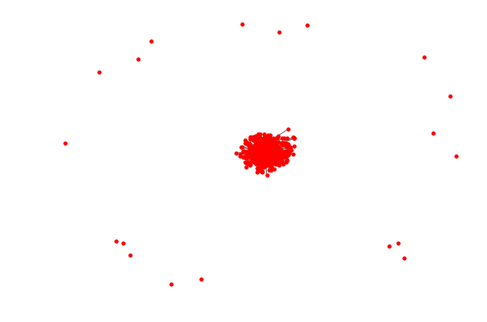

In [4]:
nx.draw(network, node_size = 10, edge_color = 'gray')

## Connected components

The force-directed display makes it easy to see that the graph is a bit fragmented (weirdly, some people only email themselves), and we are really only interested in the core of the graph. 

This is a great opportunity to use the **connected_components** function. As the name suggests, it returns all the **subgraphs** consisting of nodes that are connected by any **path**.

Here is is also good to note that this function, and many others in NetworkX, returns a [generator](https://wiki.python.org/moin/Generators) object. Again if you are not familiar with the concept, don't worry, just know that you have to transform it to a list to get the results, and this is when most of the computation is done.

In [5]:
parts_generator = nx.connected_components(network)

parts = list(parts_generator)
parts

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

Here we have a list of **sets**, showing the big subgraph at first, followed by some lonely nodes. 

Now let's exclude the smaller subgraphs' nodes. For this, we will use the method **remove_nodes_from**, and provide it with a list of the nodes to be removed.

(the first line of code bellow converts the list of sets to a list of integers)

In [6]:
singles = [list(x)[0] for x in parts[1:]]

network.remove_nodes_from(singles)

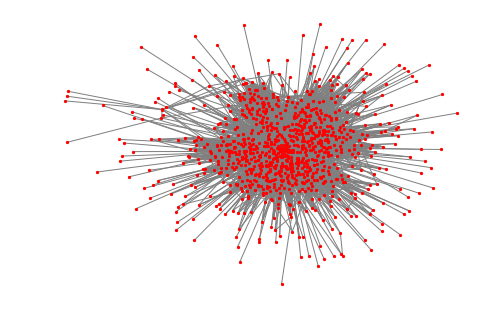

In [7]:
nx.draw(network, node_size = 5, edge_color = 'gray')

Looks better!

Now we can begging analysing this network.

## Node degree

Let's look at the node [degree](https://en.wikipedia.org/wiki/Degree_(graph_theory)) distribuition of the graph as it is usually very informative of the type of graph we are looking at.

This can be accessed on the **degree** attribute of the Graph, and it outputs a object that contains the degree of every node.

In [8]:
network.degree

DegreeView({0: 44, 1: 52, 2: 95, 3: 71, 4: 96, 5: 171, 6: 115, 7: 72, 8: 37, 9: 40, 10: 47, 11: 76, 12: 58, 13: 180, 14: 80, 15: 52, 16: 74, 17: 111, 18: 56, 19: 72, 20: 74, 21: 138, 22: 15, 23: 81, 24: 40, 25: 33, 26: 35, 27: 63, 28: 105, 29: 58, 30: 68, 31: 50, 32: 35, 33: 30, 34: 31, 35: 59, 36: 45, 37: 37, 38: 47, 39: 36, 40: 60, 41: 91, 42: 75, 43: 14, 44: 106, 45: 48, 46: 73, 47: 51, 48: 59, 49: 15, 50: 17, 51: 69, 52: 26, 53: 40, 54: 51, 55: 43, 56: 48, 57: 67, 58: 126, 59: 53, 60: 55, 61: 71, 62: 216, 63: 125, 64: 170, 65: 91, 66: 36, 67: 9, 68: 48, 69: 64, 70: 18, 71: 18, 72: 8, 73: 31, 74: 93, 75: 22, 76: 24, 77: 25, 78: 23, 79: 44, 80: 72, 81: 113, 82: 233, 83: 141, 84: 132, 85: 39, 86: 218, 87: 139, 88: 33, 89: 71, 90: 29, 91: 31, 92: 44, 93: 87, 94: 44, 95: 48, 96: 120, 97: 25, 98: 25, 99: 29, 100: 41, 101: 29, 102: 23, 103: 52, 104: 33, 105: 146, 106: 142, 107: 221, 108: 43, 109: 5, 110: 11, 111: 8, 112: 21, 113: 87, 114: 142, 115: 131, 116: 83, 117: 20, 118: 32, 119: 14,

Lets extract only the values from this and display them in a histogram.

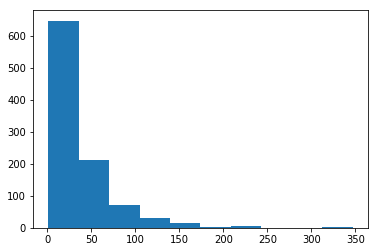

33.84787018255578

In [9]:
degree_list = [d for n, d in network.degree]

plt.hist(degree_list)
plt.show()

np.mean(degree_list)

Obs: a power law distribuition like this indicated that the network was probably formed through [preferential attachment](https://en.wikipedia.org/wiki/Preferential_attachment).

## Clustering coefficient

Another informative metric is the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient) of the nodes. This coefficient gives us an idea of how densely the network is connectected around each node. 

We use the function **clustering** for this

In [10]:
clustering_coeff = nx.clustering(network)
clustering_coeff

{0: 0.2764227642276423,
 1: 0.2653061224489796,
 2: 0.2978027115474521,
 3: 0.38491048593350385,
 4: 0.31869137497140243,
 5: 0.10700197238658778,
 6: 0.15518331226295828,
 7: 0.28778467908902694,
 8: 0.4470588235294118,
 9: 0.42532005689900426,
 10: 0.3154486586493987,
 11: 0.22917437985931136,
 12: 0.3025974025974026,
 13: 0.11089951120421507,
 14: 0.21578421578421578,
 15: 0.3526530612244898,
 16: 0.28470936690114773,
 17: 0.28593272171253825,
 18: 0.30118798043326345,
 19: 0.28322981366459626,
 20: 0.28482003129890454,
 21: 0.24803921568627452,
 22: 0.38461538461538464,
 23: 0.3427458617332035,
 24: 0.38549075391180654,
 25: 0.48295454545454547,
 26: 0.5208333333333334,
 27: 0.36885245901639346,
 28: 0.34475537787930705,
 29: 0.3935064935064935,
 30: 0.4027972027972028,
 31: 0.4122340425531915,
 32: 0.5473484848484849,
 33: 0.5793650793650794,
 34: 0.6379310344827587,
 35: 0.41228070175438597,
 36: 0.46511627906976744,
 37: 0.43025210084033616,
 38: 0.39595959595959596,
 39: 0.4812

Again, let's look at the distribuition and the mean clustering coefficient.

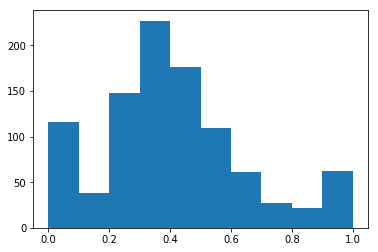

0.4070504475195386

In [11]:
plt.hist(clustering_coeff.values())
plt.show()

np.mean(list(clustering_coeff.values()))

## Average shortest path lenght

Now we could start to look at metrics concerning how all the nodes are connected.

As the name suggest, a "shortest path lenght" between nodes *a* and *b* is the minimum number of of steps you need to take to reach *b* from *a*. The average shortest path is then taken between all node combinations. 

This gives you another metric for how well connected the network is.

Obs: You might think that this would take a long time to calculate, but clever **dynamic programming** technique allows this to be done with much fewer computations.


In [12]:
nx.average_shortest_path_length(network)

2.586933824816466

## Diameter

The diameter of a network is its maximum shortest path lenght among any nodes in the network.

In [13]:
nx.diameter(network)

7

## Maximum cliques

We can also find the **maximum cliques** in the network using the **find_cliques** function. A maximum clique is one that is not a subset of any other larger clique. Beware that in large networks there can be a very large number of them!
Lets see how many of them we have here

In [14]:
cliques = nx.find_cliques(network)
len(list(cliques))

42709

## Depht and Breath first seach

These are two [**graph traversal**](https://en.wikipedia.org/wiki/Graph_traversal) algorithms, and differ in their approach to the traversal.

There are many [functions](https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html) on NetoworkX dealing with traversal, but lets use the **dfs_tree** and **bfs_tree** functions, which output the **tree objects** resulting from the paths taken by the traversal algorithms. Lets create those trees and draw them.

Note that to perform the traversal we have to specify the starting (or root) node, I'll choose node 0 to start with.

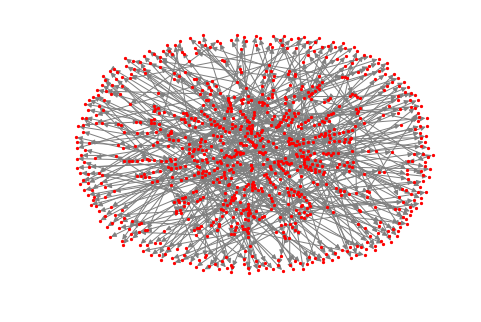

In [15]:
tree = nx.dfs_tree(network, 0)
nx.draw(tree, node_size = 5, edge_color = 'gray')

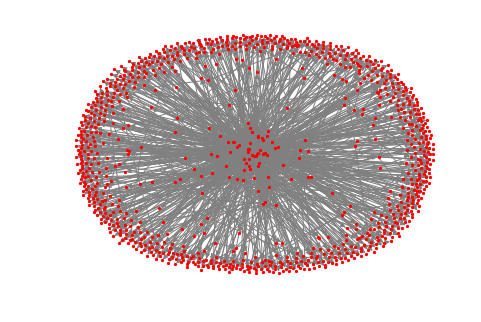

In [16]:
tree = nx.bfs_tree(network, 0)
nx.draw(tree, node_size = 5, edge_color = 'gray')

We can see they look very different, but don't judge them by their looks, we have now many quantitative tools to analyse them.

* What do you expect from their diameters?
* What about their number of cliques?
* And their degree distribuition?

## Minimum spanning tree

A **spanning tree** is a **tree** made of a subset of the graph edges that connects all nodes with the minimum number of edges possible.

Let's create a minimum spanning tree for this network and see what it looks like

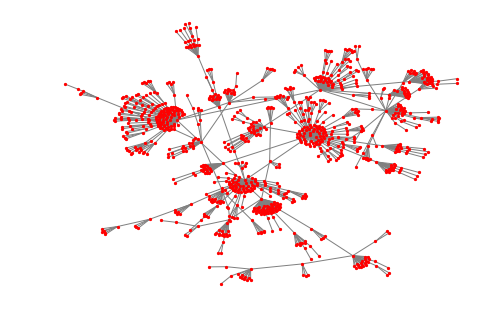

In [17]:
tree = nx.minimum_spanning_tree(network)

nx.draw(tree, node_size = 5, edge_color = 'gray')

# Community detection

Communities in a network are very loosely defined as groups of nodes that are very well connected within themselves but not between themselves.

With such a loose definition, many algorithms exists each with its own interpretation of what a community is. [This article](https://www.nature.com/articles/srep30750) has a very good review of them.

Here will use the [Girvan–Newman](https://en.wikipedia.org/wiki/Girvan–Newman_algorithm) algorithm as an example, and it is based on the concept of [edge betweenness](https://en.wikipedia.org/wiki/Betweenness_centrality) and provides a hierarchy of communities.

It is good to note here that a most community detection algorithms have a high complexity and so it might take a long time to run in a large network, so we will switch to a much smaller network as an example.

The **karate_club_graph** function in NetworkX loads this example network, lets look at it:

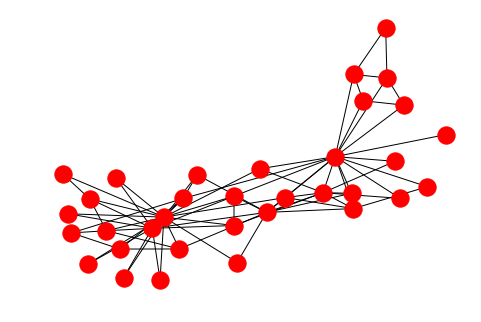

In [18]:
community_network = nx.karate_club_graph()
nx.draw(community_network)

Much simpler! 

Now lets run the community detection algorithm and see what happens. The Girvan–Newman algorithm, together with the other community detection algorithms, are hidden in the **algorithms.community** module of NetworkX.

In [19]:
partitions = nx.algorithms.community.girvan_newman(community_network)

And we can see how the partitions look like

In [20]:
part_list = list(partitions)
part_list

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {9},
  {11},
  {26}),
 ({0, 1, 3, 7, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 29, 30, 32, 33},
  {

You can see there are many levels of the hierarchical structure, and a list of all the nodes in each community at every level.

Lets try to visualize them in the network by coloring the nodes acording to their corresponding community. I'll chose to go with with the forth level for this.

In [21]:
communities = part_list[3]
communities

({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9})

But first we need to do a trick to convert this list of which node belongs to which community to a list of what is the community of each node. A bit confusing, but once this is done we can tell NetworkX's **draw** function to color each node with the color corresponding to their commuinity.

Let's see

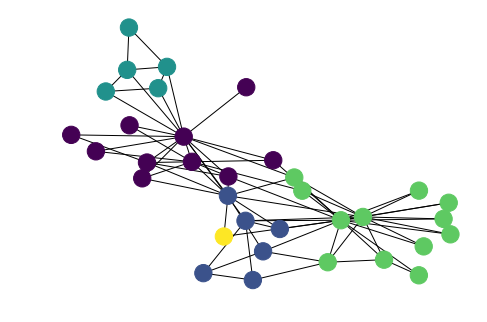

In [22]:
colors = np.zeros(nx.number_of_nodes(community_network))

for i in range(len(communities)):
    nodes = list(communities[i])
    for j in range(len(nodes)):
        colors[nodes[j]] = i

nx.draw(community_network, node_color = colors)


So, network analysis is a very broad field and we here only mentioned a few of the tools avaliable to you. 
For instance, NetworkX has an [implementation](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) of Google's own [PageRank](https://en.wikipedia.org/wiki/PageRank) algoritm that you could use to analyze the importance of every node in the network.

If you want to learn more of what NetworkX has to offer, you can [read the docs](https://networkx.github.io/documentation/stable/reference/index.html)

# The task

In the data/ directory, there are three files (N1.txt, N2.txt, N3.txt) that represent three different networks (all are undirected and unweighted). 

One is a social network of email exchanges at a Spanish university [3], one is the Western States power grid [4], and one is the (largest cluster of the) protein interaction network in yeast [5].

Your task now it to use the tools to decide which network corresponds to which file. The more information you gather to support your conclusions, the better.


# And maybe a more advanced task

The first network has a ground-truth for the communities, as we know which departament each of the node belongs to. This information can be found in the *email-Eu-core-department-labels.txt* file.
This means that it can be used to benchmark community detection algorithms.

* You may choose to test NetworkX many [community detection algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/community.html). Beware that some of those algorithms have a very high complexity and might take a long time to run.
* You can try to install and use [this Python package](https://github.com/taynaud/python-louvain) that is a plug-in to NetworkX and implements the [Louvain method](https://en.wikipedia.org/wiki/Louvain_Modularity) which is quite fast.
* You could also use [IGraph](http://igraph.org/) which has a Python, C and R packages, is very fast and has many more community detection algorithm implementations. It is a bit less intuitive to use than NetworkX but also very powerful.


### References


[1] Hao Yin, Austin R. Benson, Jure Leskovec, and David F. Gleich. "Local Higher-order Graph Clustering." In Proceedings of the 23rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. 2017.

[2] J. Leskovec, J. Kleinberg and C. Faloutsos. Graph Evolution: Densification and Shrinking Diameters. ACM Transactions on Knowledge Discovery from Data (ACM TKDD), 1(1), 2007.

[3] R. Guimer, L. Danon, A. Daz-Guilera, F. Giralt, and A. Arenas. Self-similar community structure in a network of human interactions. Physical Review E, 68(6):065103, December 2003.

[4] Duncan J. Watts and Steven H. Strogatz. Collective dynamics of ‘small-world’ networks. Nature, 393(6684):440–442, June 1998.

[5] H. Jeong, S. P. Mason, A.-L. Barabasi, and Z. N. Oltvai. Lethality andcentrality in protein networks. Nature, 411(6833):41–42, May 2001.
